In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers, regularizers, callbacks, applications
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

TARGET_SIZE = (224, 224)
MODEL_PATH = "aqi_model.h5"

data = pd.read_csv("filtered_image_data.csv")

def preprocess_image(img_path, target_size=TARGET_SIZE):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    return img / 255.0 

images = []
labels = []

for index, row in data.iterrows():
    image_path = "C:/Users/Administrator/final_images/" + row['images_filename']
    image = preprocess_image(image_path)
    images.append(image)
    labels.append(row['AQI'])

images = np.array(images)
labels = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=27)

In [2]:
from tensorflow.keras.utils import plot_model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


C:\Users\Administrator\anaconda3\envs\fvedsnvlsdv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
try:
    history = models.load_model(MODEL_PATH)
    print("Loaded pre-trained model.")
except OSError:
    print("No pre-trained model found, training a new one...")
    # early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    # reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    history = model.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_val, y_val))


No pre-trained model found, training a new one...
Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 549ms/step - loss: 13682.6973 - mae: 95.6058 - val_loss: 5661.8105 - val_mae: 61.0267
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 46s 481ms/step - loss: 5489.9629 - mae: 60.0739 - val_loss: 5029.0459 - val_mae: 56.5115
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - loss: 4759.0596 - mae: 54.8665 - val_loss: 4787.9590 - val_mae: 55.4517
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 46s 487ms/step - loss: 4506.7500 - mae: 53.7793 - val_loss: 3817.2432 - val_mae: 49.1520
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 494ms/step - loss: 3927.6677 - mae: 49.1261 - val_loss: 3032.3367 - val_mae: 43.0533
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 492ms/step - loss: 3224.2131 - mae: 44.0704 - val_loss: 3363.1472 - val_mae: 47.5736
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 493ms/step - loss: 3027.2844 - mae: 42.2929 - val_loss: 2883.4175 - val_mae: 41.0453
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 47s 495ms/step - loss:

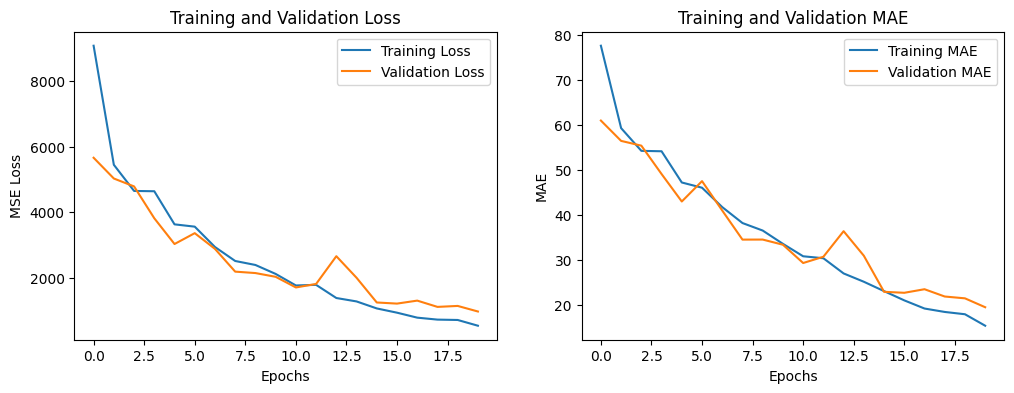

In [5]:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


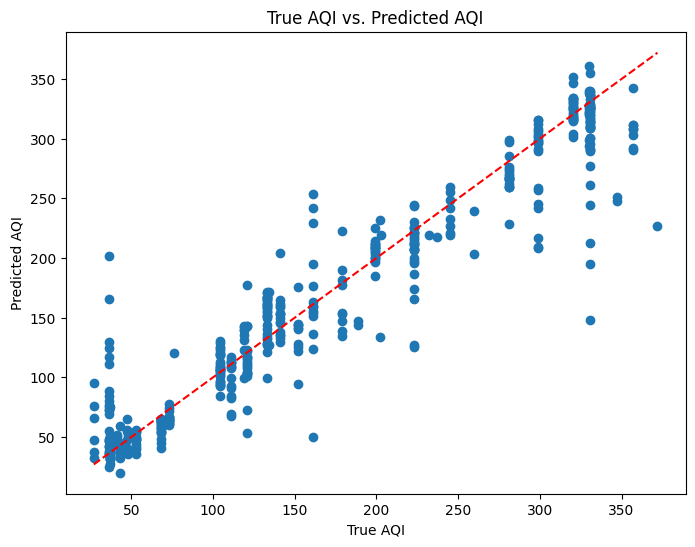

In [6]:
    y_pred = model.predict(X_val)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred)
    plt.title('True AQI vs. Predicted AQI')
    plt.xlabel('True AQI')
    plt.ylabel('Predicted AQI')
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red')
    plt.show()

In [7]:
def predict_aqi(img_path, model, target_size=TARGET_SIZE):
    """Predicts the Air Quality Index (AQI) from a given image.

    Args:
        img_path (str): Path to the image file.
        model: The trained CNN model.
        target_size (tuple, optional): The size to resize the image to. 
                                       Defaults to (224, 224).

    Returns:
        float: The predicted AQI value.
    """

    img = preprocess_image(img_path, target_size)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0][0]
    return prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


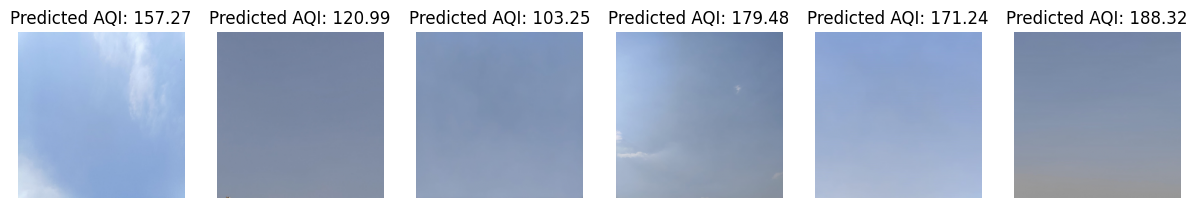

In [8]:
image_paths = [
    'C:/Users/Administrator/Desktop/image1.jpeg', 
    'C:/Users/Administrator/Desktop/image2.jpeg', 
    'C:/Users/Administrator/Desktop/image3.jpeg',
    'C:/Users/Administrator/Desktop/image4.jpeg', 
    'C:/Users/Administrator/Desktop/image5.jpeg', 
    'C:/Users/Administrator/Desktop/image6.jpeg', 
]

fig, axes = plt.subplots(1, 6, figsize=(15, 5))

for i, path in enumerate(image_paths):
    img = preprocess_image(path)
    predicted_aqi = predict_aqi(path, model)
    axes[i].imshow(img)
    axes[i].set_title(f'Predicted AQI: {predicted_aqi:.2f}')
    axes[i].axis('off')

plt.show()

In [ ]:
# image_path = 'C:/Users/Administrator/Desktop/image1.jpeg'
# predicted_aqi = predict_aqi(image_path, model)
# print("Predicted AQI:", predicted_aqi)


In [9]:
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Model saved to aqi_model.h5


In [ ]:
import gradio as gr
def predict_aqi_with_message(img):
    """Predicts AQI from an uploaded image and provides an air quality message."""
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, TARGET_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0][0]
    if prediction <= 50:
        message = f"Predicted AQI: {prediction:.2f} (Good)"
    elif 51 <= prediction <= 100:
        message = f"Predicted AQI: {prediction:.2f} (Moderate)"
    elif 101 <= prediction <= 150:
        message = f"Predicted AQI: {prediction:.2f} (Unhealthy for Sensitive Groups)"
    elif 151 <= prediction <= 200:
        message = f"Predicted AQI: {prediction:.2f} (Unhealthy)"
    elif 201 <= prediction <= 300:
        message = f"Predicted AQI: {prediction:.2f} (Very Unhealthy)"
    else:
        message = f"Predicted AQI: {prediction:.2f} (Hazardous)"
    return message
iface = gr.Interface(
    fn=predict_aqi_with_message,
    inputs=gr.inputs.Image(shape=TARGET_SIZE, label="Upload Image"),
    outputs="text",
    title="Air Quality Index Prediction",
    description="Upload an image to predict the AQI and get an air quality level."
)

iface.launch(share=True)

